# K-means Clustering
K-means clustering is an unsupervised machine learning algorithm that groups data points into clusters based on their similarity, using the distance to cluster centroid\
It aims to minimize the variance within each cluster by assigning points to the nearest centroid and updating the centroids iteratively until convergence

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [13]:
# dataset = pd.read_csv("../classification/spam.csv", encoding="latin1")
dataset = pd.read_csv("../classification/IMDB Dataset.csv")
X_raw = dataset["review"].values

In [14]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_raw)

In [15]:
model = KMeans(n_clusters=2)
pred = model.fit_predict(X)

In [16]:
dataset["pred"] = pred

In [44]:
dataset.head()

,review,sentiment,pred
0,One of the other reviewers has mentioned that ...,positive,0
1,A wonderful little production. <br /><br />The...,positive,0
2,I thought this was a wonderful way to spend ti...,positive,0
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0


In [ ]:
def display_pca_scatterplot(vectorizer, dataset):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection="3d")
    pca = PCA()
    pca.fit(vectorizer.transform(dataset["review"].values))
    for i in range(2):
        dataset_0 = dataset.loc[dataset["pred"] == i]
        words = dataset_0["review"].values
        word_vectors = vectorizer.transform(words)

        twodim = pca.transform(word_vectors)[:, :3]

        ax.scatter(
            twodim[:, 0], twodim[:, 1], twodim[:, 2], c="r" if i == 0 else "b", s=64
        )

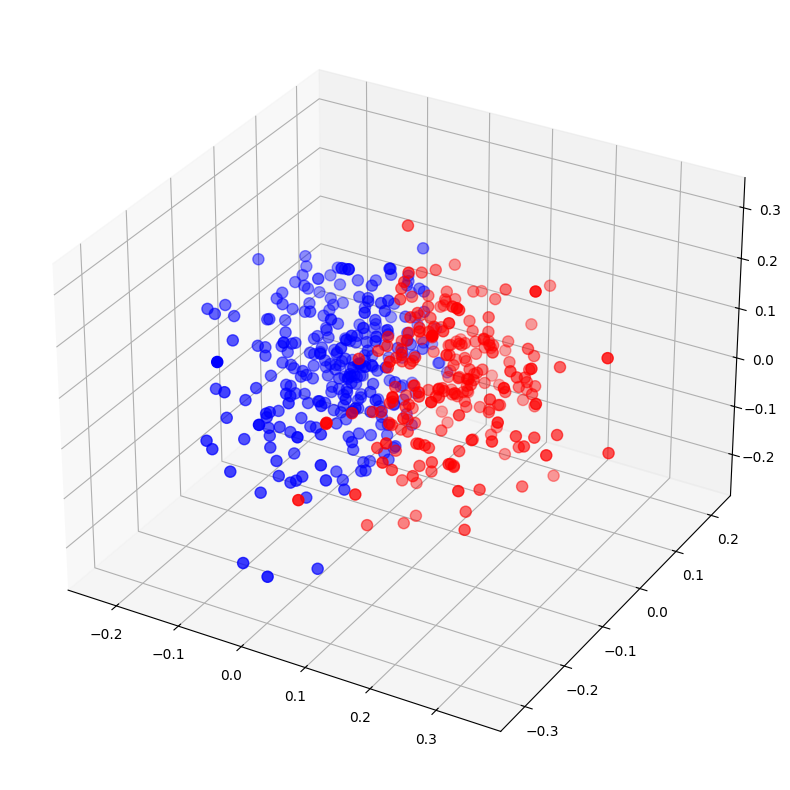

In [54]:
display_pca_scatterplot(vectorizer, dataset[:500])